# Describe Model

$\large R_t = \mu + \epsilon_t 1 + \theta \epsilon_{t-1}$

i.e. return today equals the mean, plus some noise plus a fraction of yesterdays noise

**Since only one lagged error on right hand side, this is called:**
* MA model of order 1, or
* MA(1) model

MA parameter is $\theta$

Stationary for all values of $\theta$

**If the MA paramater $\theta$ is zero, then the proccess is white noise**

**Interpretation of MA(1):**

**$\theta<0$: One-Period Mean Reversion**
* If $\theta < 0$, a positive shock last period (represendted by $\epsilon_{t-1}$), would have caused last periods return to be positive but this periods return to be negative. A shock two periods ago would have no effect on todays return.

**$\theta>0$: One-Period Momentum**


**Note** One-period autocorelation is $\theta/(1+\theta^2)$ NOT $\theta$

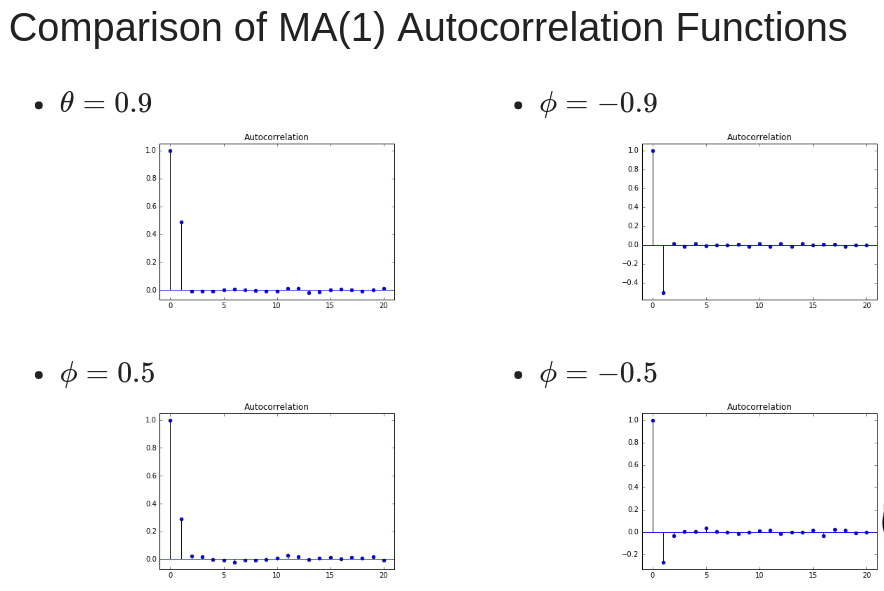

When $\theta>0$, lag one auto corrolation is positive and when $\theta<0$, lag one auto-corrolation is negative.

**Example of MA(1) Process: Intraday Stock Returns**


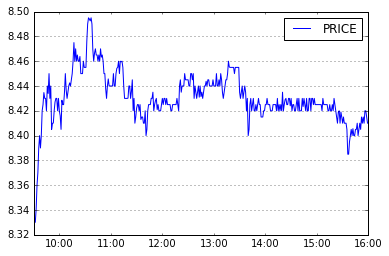

Stock price can bounce between 1 cent incremeants. This behavior induces a negative lag one auto-corolation but not auto-corr after lag 1. (in the case of MA1)

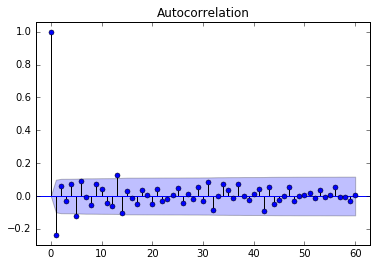

In [ ]:
#Simulating an MA Process
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1])
ma = np.array([1, 0.5])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

Note: unlike the AR simulation you dont need to reverse the sign of theta.

## Simulate MA(1) Time Series

You will simulate and plot a few MA(1) time series, each with a different parameter, θ, using the arima_process module in statsmodels, just as you did in the last chapter for AR(1) models. You will look at an MA(1) model with a large positive θ and a large negative θ.

As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of 1, but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with θ=−0.9, the array representing the MA parameters would be ma = np.array([1, -0.9])

/home/jeroen/miniconda3/envs/datacamp/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


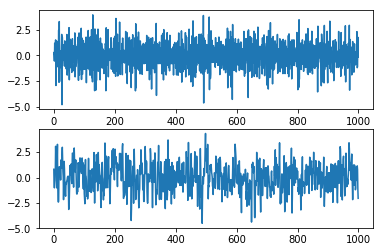

In [5]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1,ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

In [12]:
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)

The three MA parameters produce different time series plots, but in the next exercise you'll really be able to distinguish the three series.


## Compute the ACF for Several MA Time Series


Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not θ, but rather θ/(1+θ2). For example, if the MA parameter, θ, is = +0.9, the first-lag autocorrelation will be 0.9/(1+(0.9)2)=0.497, and the autocorrelation at all other lags will be zero. If the MA parameter, θ, is -0.9, the first-lag autocorrelation will be −0.9/(1+(−0.9)2)=−0.497.

You will verify these autocorrelation functions for the three time series you generated in the last exercise.

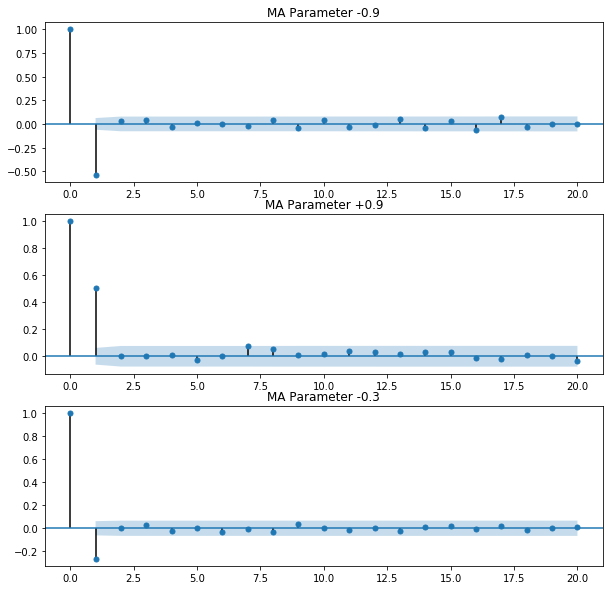

In [20]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot three ACF on same page for comparison using subplots
fig, axes = plt.subplots(3,1, figsize=(10,10))

# Plot 1: AR parameter = -0.9
plot_acf(simulated_data_1, lags=20, ax=axes[0])
axes[0].set_title("MA Parameter -0.9")

# Plot 2: AR parameter = +0.9
plot_acf(simulated_data_2, lags=20, ax=axes[1])
axes[1].set_title("MA Parameter +0.9")

# Plot 3: AR parameter = -0.3
plot_acf(simulated_data_3, lags=20, ax=axes[2])
axes[2].set_title("MA Parameter -0.3")
plt.show()

## Match ACF with MA Model

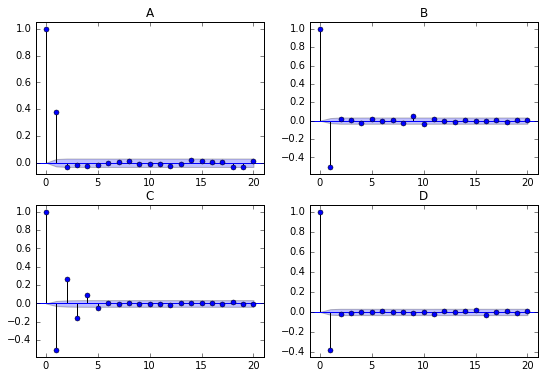

Which figure corresponds to an MA(1) model with an MA parameter of -0.5? **D**

# Estimation and Forecasting an MA Model

In [ ]:
#Estimating an MA Model
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(0,1))
result = mod.fit()

**NOTE:** Unlike the AR model forcasts, all the forcasts after time step 1 will be the same

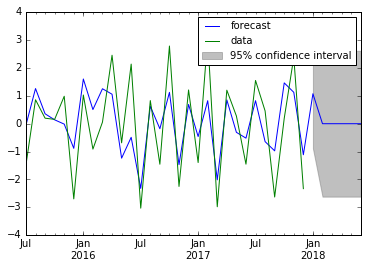